In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file = "SIRENE_GEO_122016.csv"
df = pd.read_table(file, sep=";", encoding="ISO-8859-1")

C:\Users\bberthaud\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (38,45,48,72,73,74,75,76) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
df.head()

,SIRET,SIREN,NIC,CODE_INSEE,LIBCOM,ADR_NORMAL,ADR_DECLAR,NJ,NJ_NIV1,NJ_NIV2,...,DU,TU,UU,EPCI,TCD,ZEMET,_x_epsg3946,_y_epsg3946,_lon_epsg4326,_lat_epsg4326
0,572065100040,5720651,40,69382,LYON 2EME,SA DES ETS RENE DUFOUR - 10 RUE GENERAL PLESSI...,SA DES ETS RENE DUFOUR - 10 RUE GAL PLESSIER -...,5498.0,Société commerciale,Société à responsabilité limitée (SARL),...,0.0,7,58.0,200046977,72,8214,1.842026e+06,5.173993e+06,4.825606,45.751347
1,708077300208,7080773,208,69091,GIVORS,DOLMEN LYON SORTIE GIVORS OUEST - CARRIERS MEN...,CARRIERS MEN ARVOR - DOLMEN LYON - SORTIE GIVO...,5710.0,Société commerciale,Société par actions simplifiée,...,0.0,7,58.0,200046977,32,8214,1.835283e+06,5.154820e+06,4.733592,45.580238
2,1545023200044,15450232,44,69271,CHASSIEU,T21 - 39 RUE AMPERE - 69680 CHASSIEU - FRANCE,T21 - 39 RUE AMPERE - 69680 CHASSIEU -,5498.0,Société commerciale,Société à responsabilité limitée (SARL),...,0.0,7,58.0,200046977,22,8214,1.853715e+06,5.171720e+06,4.975071,45.728400
3,1625002900630,16250029,630,69278,GENAY,APRR - DIR REG EXPLOIT RHONE AIN - GARE DE PEA...,APRR - DIR REG EXPLOIT RHONE-AIN - GARE DE PEA...,5510.0,Société commerciale,Société anonyme à conseil d'administration,...,0.0,7,58.0,200046977,21,8214,1.842414e+06,5.190281e+06,4.835407,45.897784
4,1625002901208,16250029,1208,69383,LYON 3EME,APRR - 20 RUE DE LA VILLETTE - CS 33413 - 6932...,APRR - CS 33413 - 20 RUE DE LA VILLETTE - 6900...,5510.0,Société commerciale,Société anonyme à conseil d'administration,...,0.0,7,58.0,200046977,72,8214,1.844799e+06,5.175280e+06,4.861621,45.762351


In [3]:
# nb entreprises
len(df)

227318

In [4]:
col_interest = ['NAFEN_NIV1', 'LIBTEFEN', '_lon_epsg4326', '_lat_epsg4326']
df_interest = df[col_interest]
df_interest.rename(columns={'NAFEN_NIV1': 'secteur', 'LIBTEFEN': 'RH', '_lon_epsg4326': 'lng', '_lat_epsg4326': 'lat'}, inplace=True)

C:\Users\bberthaud\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
df_interest.head()

,secteur,RH,lng,lat
0,Activités immobilières,0 salarié,4.825606,45.751347
1,Industries extractives,50 à 99 salariés,4.733592,45.580238
2,"Activités spécialisées, scientifiques et techn...",0 salarié,4.975071,45.728400
3,Transports et entreposage,2 000 à 4 999 salariés,4.835407,45.897784
4,Transports et entreposage,2 000 à 4 999 salariés,4.861621,45.762351


In [6]:
class_RH = np.unique(df_interest['RH'])
class_RH

array(['0 salarié', '1 000 à 1 999 salariés', '1 ou 2 salariés',
       '10 000 salariés et plus', '10 à 19 salariés',
       '100 à 199 salariés', '2 000 à 4 999 salariés', '20 à 49 salariés',
       '200 à 249 salariés', '250 à 499 salariés', '3 à 5 salariés',
       '5 000 à 9 999 salariés', '50 à 99 salariés', '500 à 999 salariés',
       '6 à 9 salariés', 'Unités non employeuses'], dtype=object)

In [7]:
len(class_RH)

16

In [8]:
# estimation of workforce
df_interest.loc[(df_interest.RH == '0 salarié'),'RH'] = 0
df_interest.loc[(df_interest.RH == '1 000 à 1 999 salariés'),'RH'] = 1500
df_interest.loc[(df_interest.RH == '1 ou 2 salariés'),'RH'] = 2
df_interest.loc[(df_interest.RH == '10 000 salariés et plus'),'RH'] = 10000
df_interest.loc[(df_interest.RH == '10 à 19 salariés'),'RH'] = 15
df_interest.loc[(df_interest.RH == '100 à 199 salariés'),'RH'] = 150
df_interest.loc[(df_interest.RH == '2 000 à 4 999 salariés'),'RH'] = 3500
df_interest.loc[(df_interest.RH == '20 à 49 salariés'),'RH'] = 35
df_interest.loc[(df_interest.RH == '200 à 249 salariés'),'RH'] = 225
df_interest.loc[(df_interest.RH == '250 à 499 salariés'),'RH'] = 350
df_interest.loc[(df_interest.RH == '3 à 5 salariés'),'RH'] = 4
df_interest.loc[(df_interest.RH == '5 000 à 9 999 salariés'),'RH'] = 7500
df_interest.loc[(df_interest.RH == '50 à 99 salariés'),'RH'] = 75
df_interest.loc[(df_interest.RH == '500 à 999 salariés'),'RH'] = 750
df_interest.loc[(df_interest.RH == '6 à 9 salariés'),'RH'] = 8
df_interest.loc[(df_interest.RH == 'Unités non employeuses'),'RH'] = 0

df_interest = df_interest.astype({'RH': int})
df_interest.head()

C:\Users\bberthaud\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,secteur,RH,lng,lat
0,Activités immobilières,0,4.825606,45.751347
1,Industries extractives,75,4.733592,45.580238
2,"Activités spécialisées, scientifiques et techn...",0,4.975071,45.728400
3,Transports et entreposage,3500,4.835407,45.897784
4,Transports et entreposage,3500,4.861621,45.762351


In [9]:
df_interest = df_interest.astype({'secteur': str})
class_secteur = np.unique(df_interest['secteur'])
class_secteur

array(['Activités de services administratifs et de soutien',
       'Activités extra-territoriales',
       "Activités financières et d'assurance", 'Activités immobilières',
       'Activités spécialisées, scientifiques et techniques',
       'Administration publique', 'Agriculture, sylviculture et pêche',
       'Arts, spectacles et activités récréatives',
       'Autres activités de services',
       "Commerce ; réparation d'automobiles et de motocycles",
       'Construction', 'Enseignement', 'Hébergement et restauration',
       'Industrie manufacturière', 'Industries extractives',
       'Information et communication',
       "Production et distribution d'eau ; assainissement, gestion des déchets et dépollution",
       "Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné",
       'Santé humaine et action sociale', 'Transports et entreposage',
       'nan'], dtype=object)

In [10]:
len(class_secteur)

21

In [11]:
df_interest.groupby('secteur').sum()['RH'].sort_values(ascending=False)

secteur
Commerce ; réparation d'automobiles et de motocycles                                     4758044
Administration publique                                                                  4539128
Activités financières et d'assurance                                                     4080820
Transports et entreposage                                                                3527629
Hébergement et restauration                                                              2989237
Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné         2160802
Santé humaine et action sociale                                                          2149548
Activités spécialisées, scientifiques et techniques                                       984020
Information et communication                                                              980587
Activités de services administratifs et de soutien                                        952376
Industrie manufacturiè

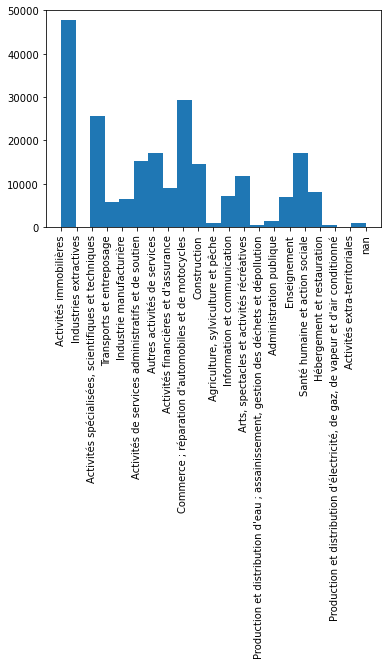

In [12]:
plt.hist(df_interest['secteur'], bins=len(class_secteur))
plt.xticks(rotation=90);

In [13]:
for i, secteur in enumerate(class_secteur):
    df_interest.loc[(df_interest.secteur == secteur),'secteur'] = i

In [14]:
df_interest.head()

,secteur,RH,lng,lat
0,3,0,4.825606,45.751347
1,14,75,4.733592,45.580238
2,4,0,4.975071,45.728400
3,19,3500,4.835407,45.897784
4,19,3500,4.861621,45.762351


In [15]:
df_interest.isna().sum()

secteur    0
RH         0
lng        0
lat        0
dtype: int64

In [16]:
df_interest['capitaux'] = np.random.randint(101, size=len(df_interest))

In [17]:
df_interest.head()

,secteur,RH,lng,lat,capitaux
0,3,0,4.825606,45.751347,29
1,14,75,4.733592,45.580238,77
2,4,0,4.975071,45.728400,52
3,19,3500,4.835407,45.897784,96
4,19,3500,4.861621,45.762351,47


In [19]:
df_interest.to_csv('data_processed.csv')

In [22]:
secteur_sorted = df_interest.groupby('secteur').sum()['RH'].sort_values(ascending=False)
secteur_sorted

secteur
5     4510247
9     3994919
19    2153663
12    1212667
18    1134157
2      993917
15     916375
4      807732
0      618037
17     522899
11     350416
13     295633
10     204871
16      99829
3       65686
8       51083
20      15889
7       11834
6         393
14        199
1          67
Name: RH, dtype: int32

In [23]:
class_secteur[secteur_sorted.index]

array(['Administration publique',
       "Commerce ; réparation d'automobiles et de motocycles",
       'Transports et entreposage', 'Hébergement et restauration',
       'Santé humaine et action sociale',
       "Activités financières et d'assurance",
       'Information et communication',
       'Activités spécialisées, scientifiques et techniques',
       'Activités de services administratifs et de soutien',
       "Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné",
       'Enseignement', 'Industrie manufacturière', 'Construction',
       "Production et distribution d'eau ; assainissement, gestion des déchets et dépollution",
       'Activités immobilières', 'Autres activités de services', 'nan',
       'Arts, spectacles et activités récréatives',
       'Agriculture, sylviculture et pêche', 'Industries extractives',
       'Activités extra-territoriales'], dtype=object)